<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Analysis-Interview-Challenge" data-toc-modified-id="Data-Analysis-Interview-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Analysis Interview Challenge</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Problem-Identification" data-toc-modified-id="Problem-Identification-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Identification</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Packages" data-toc-modified-id="Import-Libraries-and-Packages-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Import Libraries and Packages</a></span></li><li><span><a href="#Import-Datasets" data-toc-modified-id="Import-Datasets-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Import Datasets</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Missing-Values-and-Imputation" data-toc-modified-id="Missing-Values-and-Imputation-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Missing Values and Imputation</a></span></li></ul></li><li><span><a href="#Preprocessing-and-Training-Data-Development" data-toc-modified-id="Preprocessing-and-Training-Data-Development-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Preprocessing and Training Data Development</a></span></li><li><span><a href="#Machine-Learning-Modeling" data-toc-modified-id="Machine-Learning-Modeling-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Machine Learning Modeling</a></span><ul class="toc-item"><li><span><a href="#Model-Performance-Evaluation" data-toc-modified-id="Model-Performance-Evaluation-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Model Performance Evaluation</a></span></li><li><span><a href="#Hyperparamter-Tuning-of-Random-Forest-Model" data-toc-modified-id="Hyperparamter-Tuning-of-Random-Forest-Model-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Hyperparamter Tuning of Random Forest Model</a></span></li></ul></li><li><span><a href="#Documentation" data-toc-modified-id="Documentation-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Documentation</a></span></li></ul></li></ul></div>

# Data Analysis Interview Challenge

## Introduction

The purpose of this notebook is to solve the questions given in the Data Analysis Interview Challenge. For all the data analysis challenges, I have been following the Data Science Method (DSM) which is shown below for quick reference:

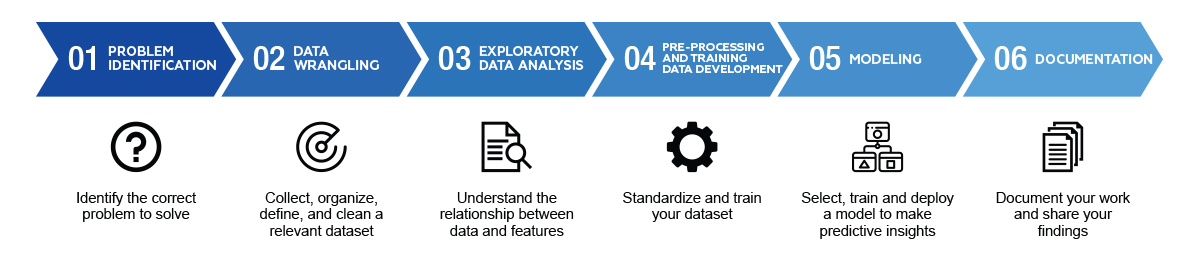

## Problem Identification

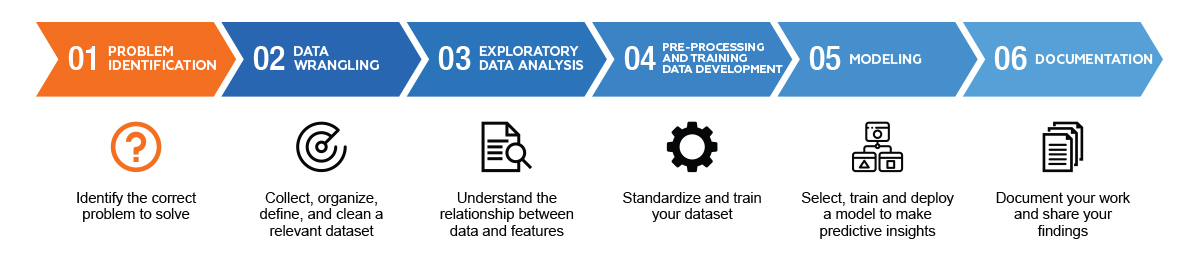

The data is available as two attached CSV files:

takehome_user_engagement. csv

takehome_users . csv

The data has the following two tables:

1 - A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. This table includes:

    name: the user's name
    object_id: the user's id
    email: email address
    creation_source: how their account was created. This takes on one of 5 values:
        PERSONAL_PROJECTS: invited to join another user's personal workspace
        GUEST_INVITE: invited to an organization as a guest (limited permissions)
        ORG_INVITE: invited to an organization (as a full member)
        SIGNUP: signed up via the website
        SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
    creation_time: when they created their account
    last_session_creation_time: unix timestamp of last login
    opted_in_to_mailing_list: whether they have opted into receiving marketing emails
    enabled_for_marketing_drip: whether they are on the regular marketing email drip
    org_id: the organization (group of users) they belong to
    invited_by_user_id: which user invited them to join (if applicable).

2 - A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period , identify which factors predict future user adoption.

We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better -- no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

## Data Wrangling

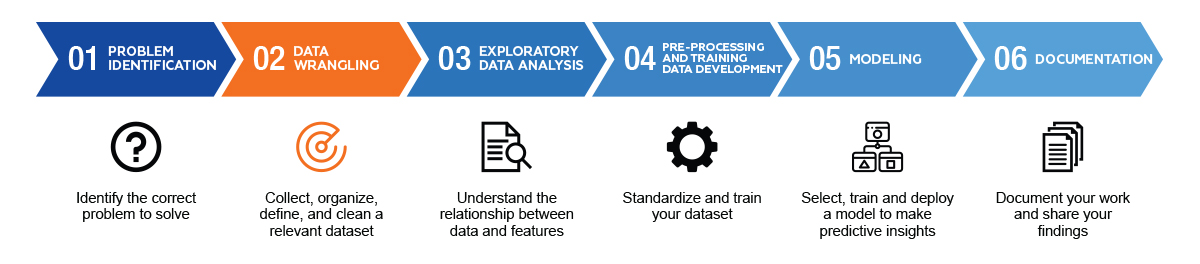

### Import Libraries and Packages

In [1]:
# Importing requiredlibraries and packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

### Import Datasets

In [2]:
# Loading the datasets
users_data = pd.read_csv("takehome_users.csv", index_col=0)
engaged_users = pd.read_csv("takehome_user_engagement.csv")

In [3]:
# Checking users_data datasets
users_data.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
# Checking engaged_users datasets
engaged_users.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
# checking datatypes
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  8823 non-null   float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


In [6]:
engaged_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
# Focusing on this - Defining an "adopted user" as a user who has logged into the product on three separate days in 
# at least one seven-day period , identify which factors predict future user adoption.
# Based on the above, converting the object timestamp into datetime format

engaged_users["time_stamp"] = pd.to_datetime(engaged_users["time_stamp"])

In [8]:
# Now setting the time_stamp as the index
engaged_users = engaged_users.set_index("time_stamp")

In [9]:
# Resampling to 7 days or 1W requirement for each user ID
engaged_users = engaged_users.groupby(by="user_id").resample("1W").sum()

In [10]:
# Checking the datasets for engaged_users
engaged_users.head()

user_id  visited
user_id time_stamp                  
1       2014-04-27        1        1
2       2013-11-17        2        1
        2013-11-24        0        0
        2013-12-01        2        1
        2013-12-08        0        0

In [11]:
# Isolating users who have signed 3 times in a week
adopted_users = engaged_users[engaged_users["visited"] > 2]
del adopted_users["user_id"]
adopted_users.head()

visited
user_id time_stamp         
2       2014-02-09        3
10      2013-03-03        3
        2013-04-14        3
        2013-04-28        3
        2013-05-05        4

In [12]:
adopted_users.shape

(33859, 1)

In [13]:
# Since the same user will be logging a multiple times, there will be duplicate user_id, 
# so if I remove the duplicates, it should give me the unique adopted users.
adopted_users_id = list(adopted_users.index)
adopted_users_list = []

for i in range(len(adopted_users_id)):
    adopted_users_list.append(adopted_users_id[i][0])
    
# Checking the length of the adopted_users_list
len(adopted_users_list)

33859

In [14]:
# Checking the length of the adopted uers list where we are keeping unique users
adopted_users_unique = set(adopted_users_list)
len(adopted_users_unique)

1445

**This means that out of a total of 12000, there are 1445 users who have adopted the product.** Based on this information, now we can add the label "adopted" to our users_data.

In [15]:
# Adding the adopted column as default value False first
users_data["adopted"] = False

In [16]:
# Now converting for the adopted users, this default value from False to True
for user in adopted_users_unique:
    users_data.loc[user, "adopted"] = True
    
# Checking the dataset if the above change has been incorporated
users_data.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


## Exploratory Data Analysis

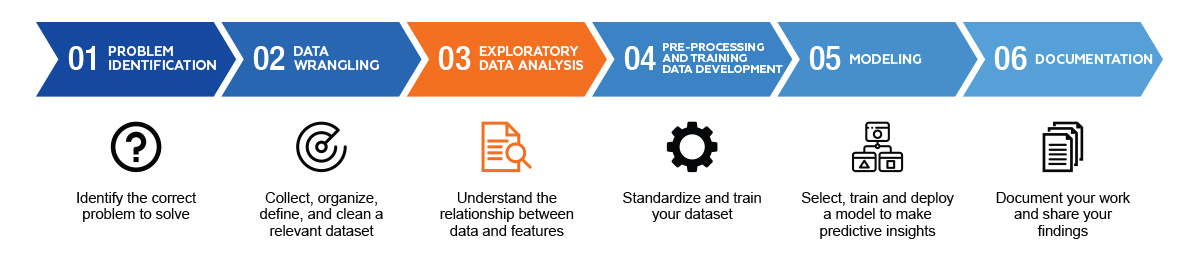

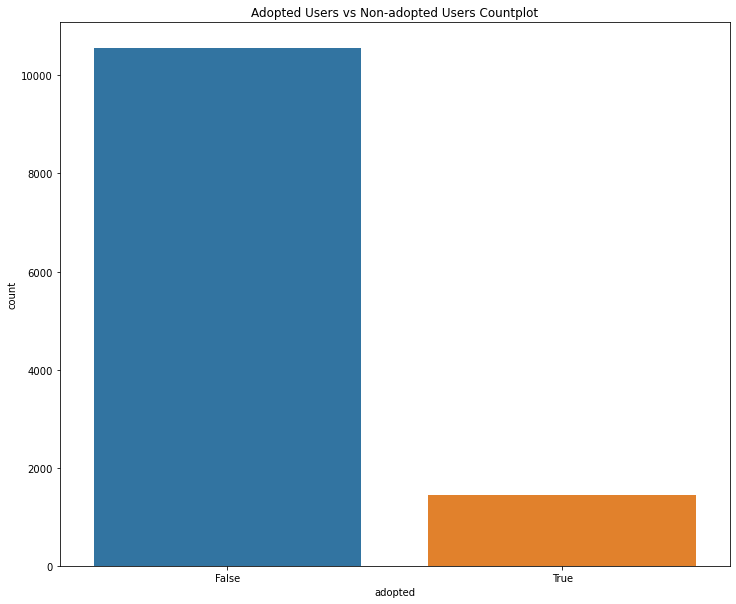

In [17]:
# Plotting with countplot for adopted users
plt.figure(figsize=(12,10))
sns.countplot(x="adopted", data=users_data)
plt.title("Adopted Users vs Non-adopted Users Countplot")
plt.show()

In [18]:
# Calculating percentage of adopted users
adopted_users_perc = (len(users_data[users_data["adopted"]==True])/ len(users_data)) * 100
print("Total percentage of adopted Users: ", adopted_users_perc)

Total percentage of adopted Users:  12.041666666666668


Adopted percentage is just 12% and this is also the target column which means that I need to find the correlations with other features to see what needs to be done to increase the adoption.

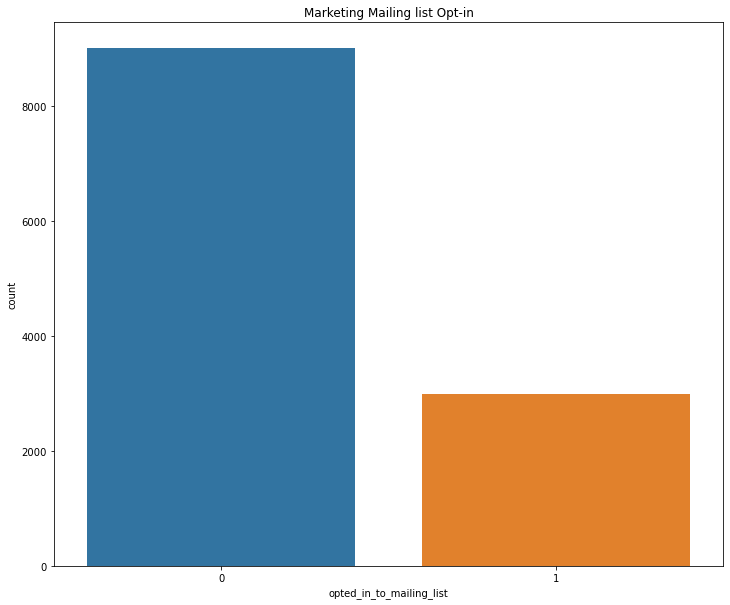

In [19]:
# Checking how many people have opted in for the marketing
plt.figure(figsize=(12,10))
sns.countplot(x="opted_in_to_mailing_list", data=users_data)
plt.title("Marketing Mailing list Opt-in")
plt.show();

A large number of people have not opted for the marketing and company should focus its energy to promote the benefits of optin to marketing campaigns so that users can get more discount offers.

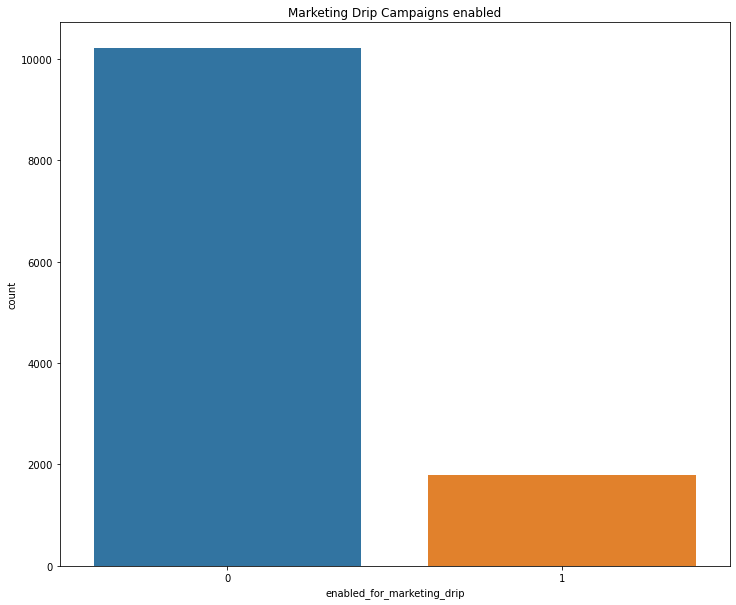

In [20]:
# Checking for "enabled for marketing drip" campaigns
plt.figure(figsize=(12,10))
sns.countplot(x="enabled_for_marketing_drip", data=users_data)
plt.title("Marketing Drip Campaigns enabled")
plt.show();

This is an eye opener as the marketing drip campaigns have not been enabled for a large number of people even for the adopted users.

In [21]:
# Checking for the correlations
users_corr = users_data.corr()
users_corr

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
last_session_creation_time,1.000000,0.006590,0.008035,0.042203,0.011874,0.403210
opted_in_to_mailing_list,0.006590,1.000000,0.483529,0.003432,0.004699,0.010339
enabled_for_marketing_drip,0.008035,0.483529,1.000000,0.009275,0.003687,0.005901
org_id,0.042203,0.003432,0.009275,1.000000,-0.057780,0.060683
invited_by_user_id,0.011874,0.004699,0.003687,-0.057780,1.000000,0.000356
adopted,0.403210,0.010339,0.005901,0.060683,0.000356,1.000000


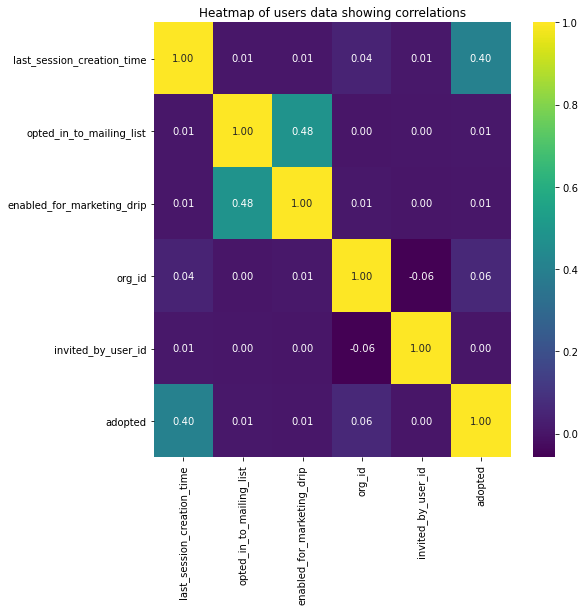

In [22]:
# Heatmap for the correlations
plt.figure(figsize=(8,8))
sns.heatmap(users_corr, cmap='viridis', annot=True, fmt='.2f')
plt.title("Heatmap of users data showing correlations")
plt.show();

### Missing Values and Imputation

In [23]:
# Finding missing values
users_data.isnull().sum()

creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted                          0
dtype: int64

From the above analysis, there are 2 columns i.e. 'last_session_creation_time' and 'invited_by_user_id' where data is missing. Since 'last_session_creation_time' is already connected with th adopted user as per the heatmap, this means its' significance is already captured and I can delete this column now.

For the other column 'invited_by_user_id', it is natural that not everyone will be invited by someone so there will be fields where this information is going to be missing. I am going to investigate further this column.

In [24]:
# Deleting the 'last_session_creation_time' column
del users_data["last_session_creation_time"]

In [25]:
# Checking the dataset
users_data.head(10)

,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,False
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,False
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,False
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,False
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,0,0,197,11241.0,False
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,0,1,37,NaN,False
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1,1,74,NaN,False
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,0,0,302,NaN,False


In [26]:
# Checking the values for the 'invited by user id'
users_data["invited_by_user_id"].value_counts(dropna=False, ascending=False)

NaN        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
           ... 
6690.0        1
9310.0        1
10801.0       1
5585.0        1
10872.0       1
Name: invited_by_user_id, Length: 2565, dtype: int64

Here 'invited_by_user_id' is a binary situation which means either you are invited by someone (True) or you're not invited by anyone (False). So I am going to use this logic to create a new column with this binary value.

In [27]:
# Creating a new column based on 'invited_by_user_id'
users_data["invited_by_user"] = users_data["invited_by_user_id"].isna()==False

# Now I don't need the column 'invited_by_user_id', so deleting it
del users_data["invited_by_user_id"]

users_data.head()

,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,invited_by_user
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,False,True
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,True,True
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,False,True
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,False,True
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,False,True


In [28]:
# Since the 'email' column is meaningful to see the email domain only to check the pattern, I am removing strings prior '@'

users_data["split_email"] = users_data["email"].apply(lambda x: x.split('@'))
del users_data["email"]

In [29]:
users_data.head()

,creation_time,name,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,invited_by_user,split_email
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,GUEST_INVITE,1,0,11,False,True,"[AugustCClausen, yahoo.com]"
2,2013-11-15 03:45:04,Poole Matthew,ORG_INVITE,0,0,1,True,True,"[MatthewPoole, gustr.com]"
3,2013-03-19 23:14:52,Bottrill Mitchell,ORG_INVITE,0,0,94,False,True,"[MitchellBottrill, gustr.com]"
4,2013-05-21 08:09:28,Clausen Nicklas,GUEST_INVITE,0,0,1,False,True,"[NicklasSClausen, yahoo.com]"
5,2013-01-17 10:14:20,Raw Grace,GUEST_INVITE,0,0,193,False,True,"[GraceRaw, yahoo.com]"


In [30]:
# Removing email domains into a separate column
users_data["email_domain"] = users_data["split_email"].apply(lambda x: x[1])
# Since the split_email is not required now, I am deleting it.
del users_data["split_email"]

In [31]:
# Checking the domain names for the emails
users_data["email_domain"].value_counts(dropna=False, ascending=False)[:12]

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
xvnbr.com            2
rerwl.com            2
oqpze.com            2
dqwln.com            2
luque.com            2
mumdc.com            2
Name: email_domain, dtype: int64

There are mainly few common domains such as gmail.com, yahoo.com, jourrapide.com, cuvox.de, gustr.com etc. and hotmail.com. So I can put together all other domains under one category as 'other'.

In [32]:
# Creating a new column named as 'domain'
users_data["domain"]= "other"
for user in range(len(users_data)):
    if users_data.loc[user+1, "email_domain"]=="gmail.com":
        users_data.loc[user+1, "domain"]="gmail.com"
    if users_data.loc[user+1, "email_domain"]=="yahoo.com":
        users_data.loc[user+1, "domain"]="yahoo.com"
    if users_data.loc[user+1, "email_domain"]=="jourrapide.com":
        users_data.loc[user+1, "domain"]="jourrapide.com"
    if users_data.loc[user+1, "email_domain"]=="cuvox.de":
        users_data.loc[user+1, "domain"]="cuvox.de"
    if users_data.loc[user+1, "email_domain"]=="gustr.com":
        users_data.loc[user+1, "domain"]="gustr.com"
    if users_data.loc[user+1, "email_domain"]=="hotmail.com":
        users_data.loc[user+1, "domain"]="hotmail.com"


In [33]:
# email_domain column is not required now so deleting it.
del users_data["email_domain"]

In [34]:
# Checking the unique values now for the domain column
users_data["domain"].value_counts(ascending=False, dropna=False)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
other             1186
gustr.com         1179
hotmail.com       1165
Name: domain, dtype: int64

## Preprocessing and Training Data Development

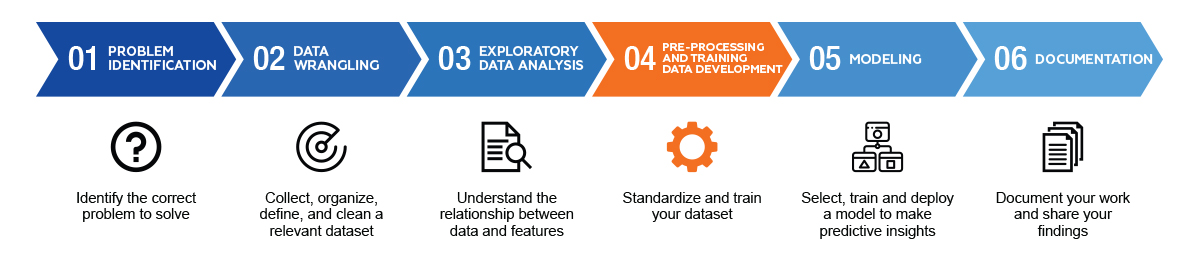

In [35]:
# Preparing datasets for the machine learning modeling
users_data.dtypes

creation_time                 object
name                          object
creation_source               object
opted_in_to_mailing_list       int64
enabled_for_marketing_drip     int64
org_id                         int64
adopted                         bool
invited_by_user                 bool
domain                        object
dtype: object

In [36]:
users_data.head()

,creation_time,name,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,invited_by_user,domain
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,GUEST_INVITE,1,0,11,False,True,yahoo.com
2,2013-11-15 03:45:04,Poole Matthew,ORG_INVITE,0,0,1,True,True,gustr.com
3,2013-03-19 23:14:52,Bottrill Mitchell,ORG_INVITE,0,0,94,False,True,gustr.com
4,2013-05-21 08:09:28,Clausen Nicklas,GUEST_INVITE,0,0,1,False,True,yahoo.com
5,2013-01-17 10:14:20,Raw Grace,GUEST_INVITE,0,0,193,False,True,yahoo.com


In [37]:
# Targetted column is adopted
df_adopted = pd.DataFrame({"adopted": users_data["adopted"].values}, index=users_data.index)

In [38]:
# Converting org_id as string as it is a unique value
users_data["org_id"] = users_data["org_id"].astype("str")

In [39]:
# Converting the categorical values into dummy variables
df_dummies = pd.get_dummies(users_data[['creation_source','org_id','domain']])

In [40]:
# Combining df_ml with df_dummies
df_ml = pd.concat([df_adopted, df_dummies], axis=1)

In [41]:
# Also combining other binary features tlo df_ml
df_ml["optin_enabled"] = users_data["opted_in_to_mailing_list"]
df_ml["mktg_enabled"] = users_data["enabled_for_marketing_drip"]
df_ml["user_invited"] = users_data["invited_by_user"]

In [42]:
df_ml.head()

,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_0,org_id_1,org_id_10,org_id_100,...,domain_cuvox.de,domain_gmail.com,domain_gustr.com,domain_hotmail.com,domain_jourrapide.com,domain_other,domain_yahoo.com,optin_enabled,mktg_enabled,user_invited
object_id,,,,,,,,,,,,,,,,,,,,,
1,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,True
2,True,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,True
3,False,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,True
4,False,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,True
5,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,True


In [43]:
# Splitting datasets into X and y
X = df_ml.drop('adopted', axis=1)
y = df_ml['adopted']

In [44]:
# Splitting into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11, stratify=y)

## Machine Learning Modeling

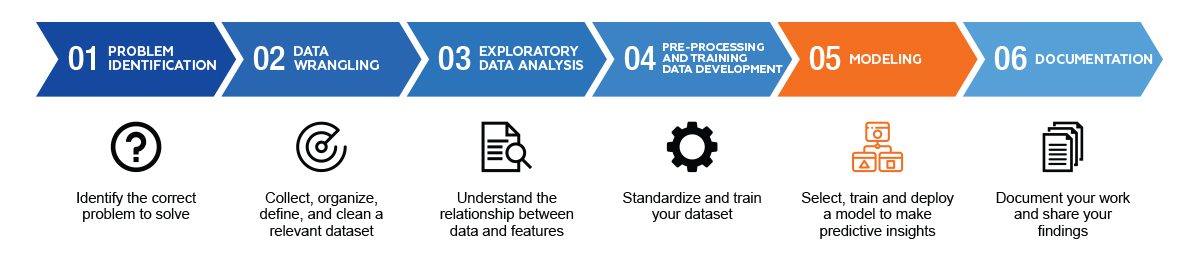

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import average_precision_score, f1_score, precision_score, plot_confusion_matrix
from sklearn.metrics import roc_curve
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

# Using XGBoost to run the model
cl_xgb = XGBClassifier(n_jobs = 5, random_state =11)
cl_xgb.fit(X_train, y_train)
y_pred_xgb = cl_xgb.predict(X_test)

print("Accuracy Score for the XGBoost Model is: ", accuracy_score(y_test, y_pred_xgb))

[12:11:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score for the XGBoost Model is:  0.8793333333333333


In [47]:
# Using Random Forest model
from sklearn.ensemble import RandomForestClassifier
cl_rf = RandomForestClassifier(n_estimators=500, random_state = 11, n_jobs=-1)
cl_rf.fit(X_train, y_train)
y_pred_rf = cl_rf.predict(X_test)

print("Accuracy Score for the Random Forest Model is: ", accuracy_score(y_test, y_pred_rf))

Accuracy Score for the Random Forest Model is:  0.8583333333333333


### Model Performance Evaluation

In [48]:
def model_result(clf,x_test,y_test):
    y_prob=clf.predict_proba(x_test)
    y_pred=clf.predict(x_test)
    print('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
    print('F1-score :',(f1_score(y_test,y_pred)))
    print('Confusion_matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print("accuracy_score")
    print(accuracy_score(y_test,y_pred))
    print("classification_report")
    print(classification_report(y_test,y_pred))

In [49]:
# XGBoost model performance results
model_result(cl_xgb, X_test, y_test)

AUPRC : 0.1533937149146478
F1-score : 0.005494505494505495
Confusion_matrix: 
[[2637    2]
 [ 360    1]]
accuracy_score
0.8793333333333333
classification_report
              precision    recall  f1-score   support

       False       0.88      1.00      0.94      2639
        True       0.33      0.00      0.01       361

    accuracy                           0.88      3000
   macro avg       0.61      0.50      0.47      3000
weighted avg       0.81      0.88      0.82      3000



In [50]:
# Random Forest model performance results
model_result(cl_rf, X_test, y_test)

AUPRC : 0.14098495912858422
F1-score : 0.06181015452538631
Confusion_matrix: 
[[2561   78]
 [ 347   14]]
accuracy_score
0.8583333333333333
classification_report
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      2639
        True       0.15      0.04      0.06       361

    accuracy                           0.86      3000
   macro avg       0.52      0.50      0.49      3000
weighted avg       0.79      0.86      0.82      3000



From the confusion matrix perspective, random forest model looks more promising even though the accuracy score is slightly less than the XGBoost model.

### Hyperparamter Tuning of Random Forest Model

In [51]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [5, 15, 30], 'min_samples_split': [2, 5, 10], 
              'min_samples_leaf': [1, 3, 5]}
grid = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_rfc = grid.predict(X_test)

print("Score for the Grid Search Model is ", grid.score(X_test, y_test))

Score for the Grid Search Model is  0.8796666666666667


In [52]:
# Listing the best estimators
grid.best_estimator_

RandomForestClassifier(max_depth=5, random_state=21)

In [53]:
# Checking for the best parameters
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [54]:
# Running the model with the optimized parameters
cl_rftuned = RandomForestClassifier(n_estimators=100, random_state = 21, n_jobs=-1, max_depth=5,
                                      min_samples_leaf=1, min_samples_split=2)
cl_rftuned.fit(X_train, y_train)
y_pred_rftuned = cl_rftuned.predict(X_test)

print("Accuracy Score for the Tuned Random Forest Model is: ", accuracy_score(y_test, y_pred_rftuned))

Accuracy Score for the Tuned Random Forest Model is:  0.8796666666666667


In [55]:
# Random Forest model performance results
model_result(cl_rftuned, X_test, y_test)

AUPRC : 0.17757321407807428
F1-score : 0.0
Confusion_matrix: 
[[2639    0]
 [ 361    0]]
accuracy_score
0.8796666666666667
classification_report
              precision    recall  f1-score   support

       False       0.88      1.00      0.94      2639
        True       0.00      0.00      0.00       361

    accuracy                           0.88      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.77      0.88      0.82      3000



## Documentation

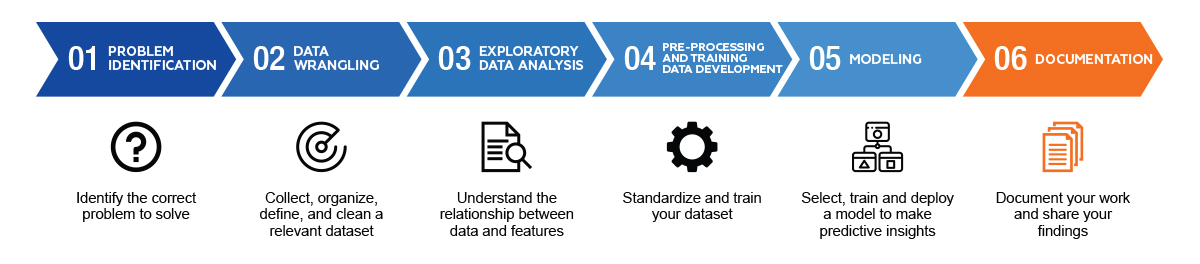

The main focus of this problem is to look at the adoption and analyze the ways to increase the adoption.

In order to look at the attributes related to adoption target feature, I am going to use the plot_importance method to find the related parameters.

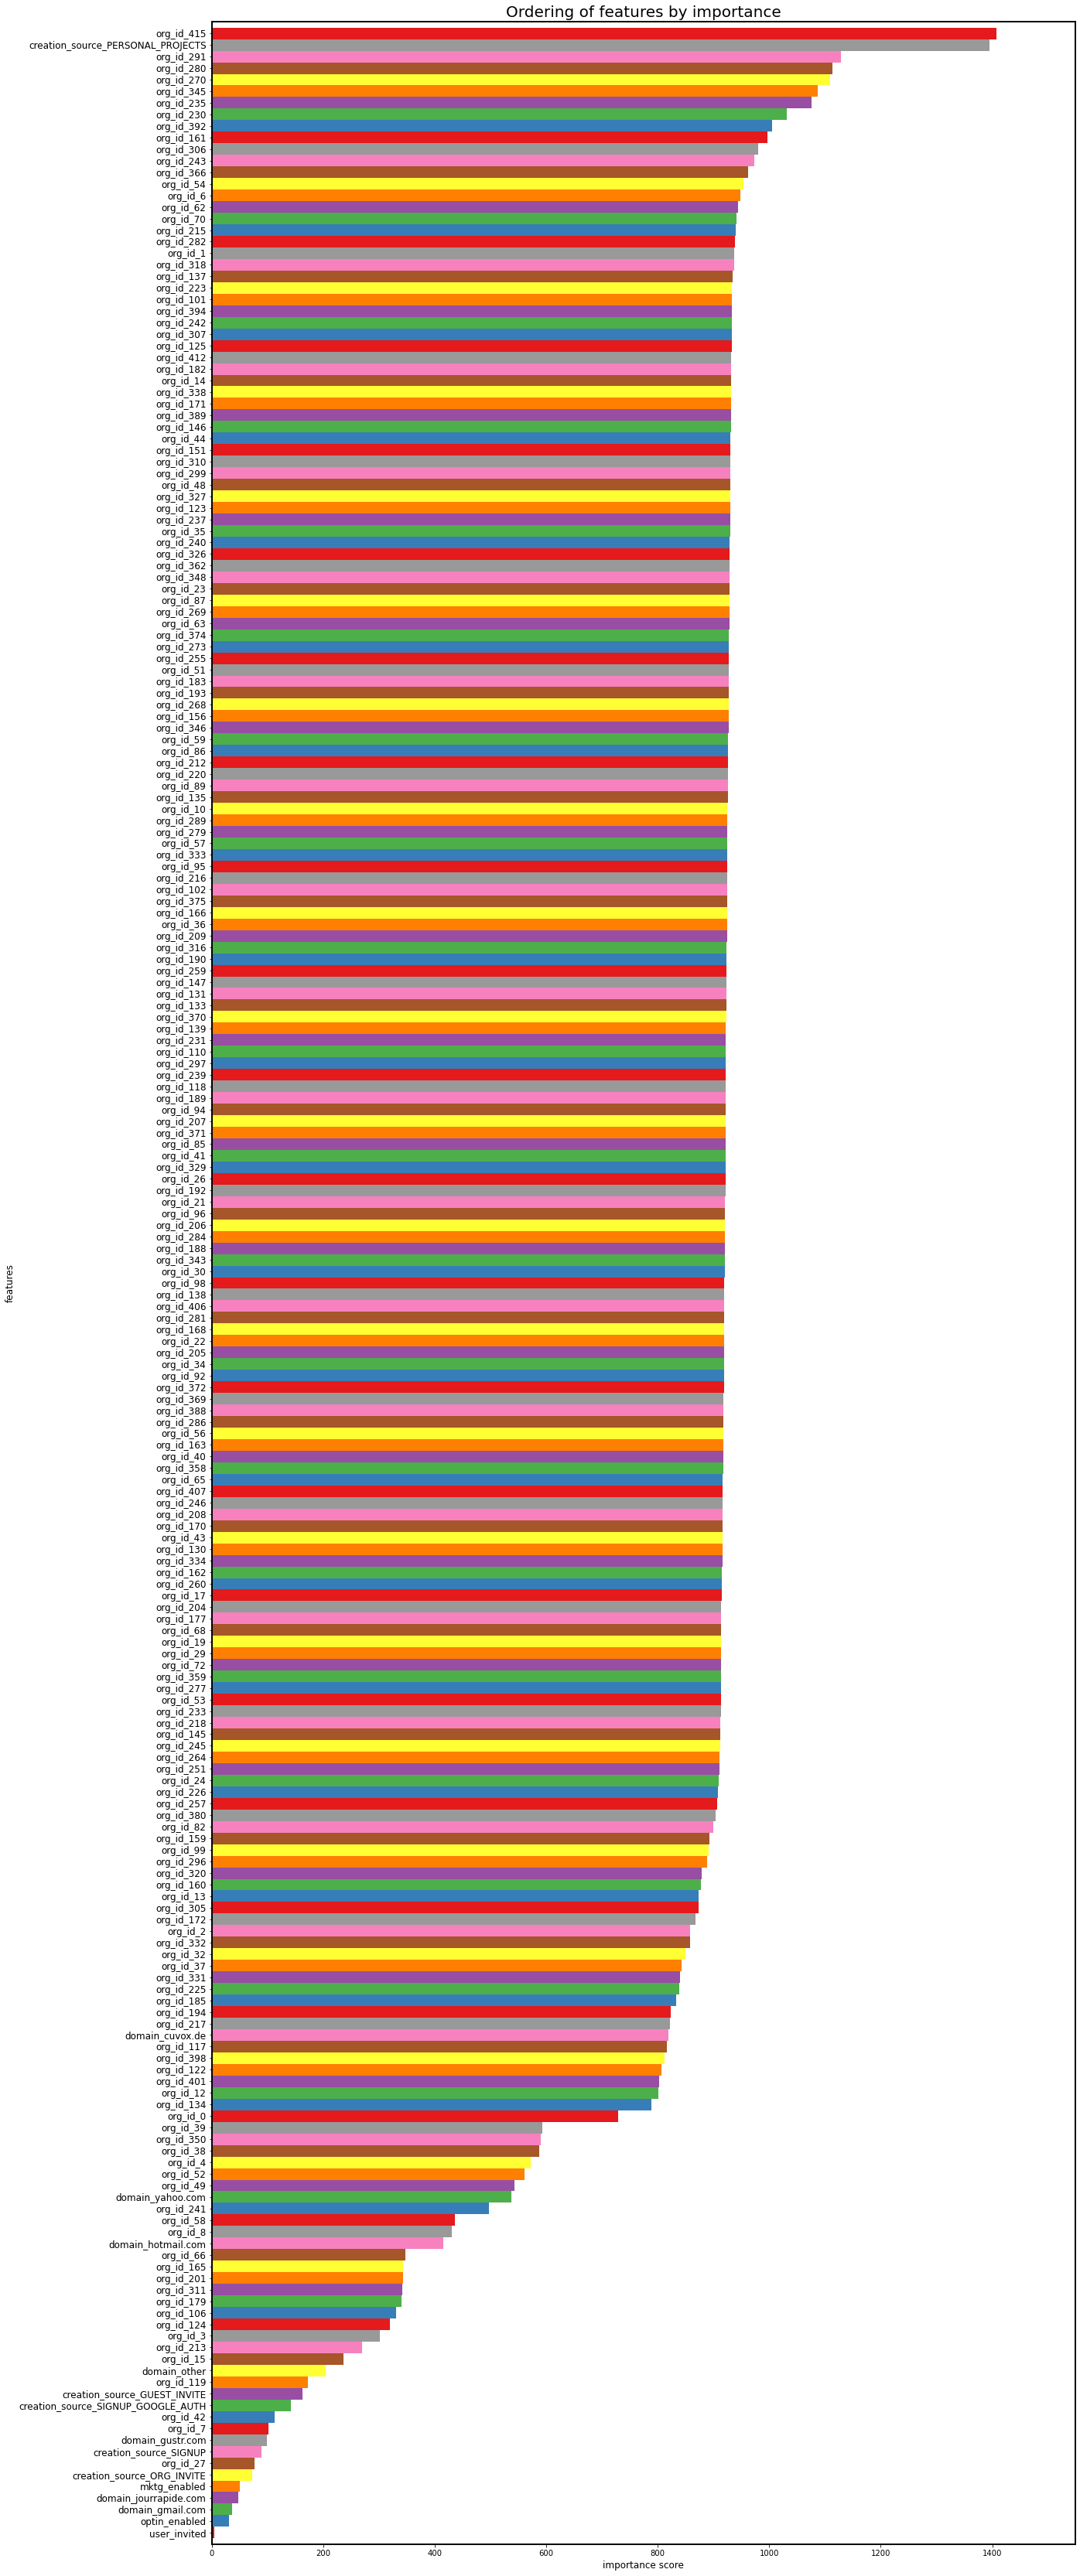

In [60]:
# Checking for which features are more important for the prediction
fig = plt.figure(figsize = (20, 60))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(cl_xgb, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 12);
ax.set_ylabel('features', size = 12);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance', size = 20);

There is a stronger correlation between adopted users and user ID which is expected. The other main attribute seems to be who invited the cutomer to use this service which is due to relationship.

In [61]:
# Based on the Random Forest, I am going to check for the important attributes
df_features = pd.DataFrame({'important_parameters': cl_rftuned.feature_importances_}, index=df_ml.columns[1:])

# sort by highest values
df_features.sort_values('important_parameters', ascending=False)[:10]

,important_parameters
creation_source_PERSONAL_PROJECTS,0.066150
domain_gmail.com,0.049383
creation_source_GUEST_INVITE,0.048672
domain_yahoo.com,0.038896
optin_enabled,0.033235
creation_source_ORG_INVITE,0.030860
creation_source_SIGNUP_GOOGLE_AUTH,0.029107
user_invited,0.028058
mktg_enabled,0.026210
creation_source_SIGNUP,0.026079


The above list is useful and it conveys the action plan required to implement to increase the adoption rate:

- Provide **campaigns with a reward system** to users who invite others to use the system
- Increase the marketing campaigns to **get a bigger mindshare** from the users
- Provide **laser-focused campaigns** to increase the adoption by inactive users by offering them discounts and offers
- Ensure **better capturing of user emails in the system** so that company can reach out to users regularly
- Provide **time-based incentives to users** and communicate its benefits to users so that they are encouraged to sign up with their preferred email service so that they don't miss the time-sensitive offers
- Focus on **measuring the success of these marketing campaigns** and keep improving with A/B testing